In [1]:
"""
Author: Anuradha Wadekar
🛒 Online Shop Analysis 📚
data source:https://www.kaggle.com/code/micaeld/online-shop-full-analysis
"""

'\nAuthor: Anuradha Wadekar\n🛒 Online Shop Analysis 📚\ndata source:https://www.kaggle.com/code/micaeld/online-shop-full-analysis\n'

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
# data reading
df = pd.read_csv(r"C:\Python\Python39\Scripts\PythonProjects\4 Online-Shop-Analysis\DataSet\Online_Shop_Customer_Sales_Data.csv")

In [133]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [134]:
df.tail()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [136]:
#df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [137]:
# Checking null values
df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [8]:
df.nunique()

Customer_id       65796
Age                  48
Gender                2
Revenue_Total       496
N_Purchases           7
Purchase_DATE       366
Purchase_VALUE    16616
Pay_Method            4
Time_Spent          961
Browser               4
Newsletter            2
Voucher               2
dtype: int64

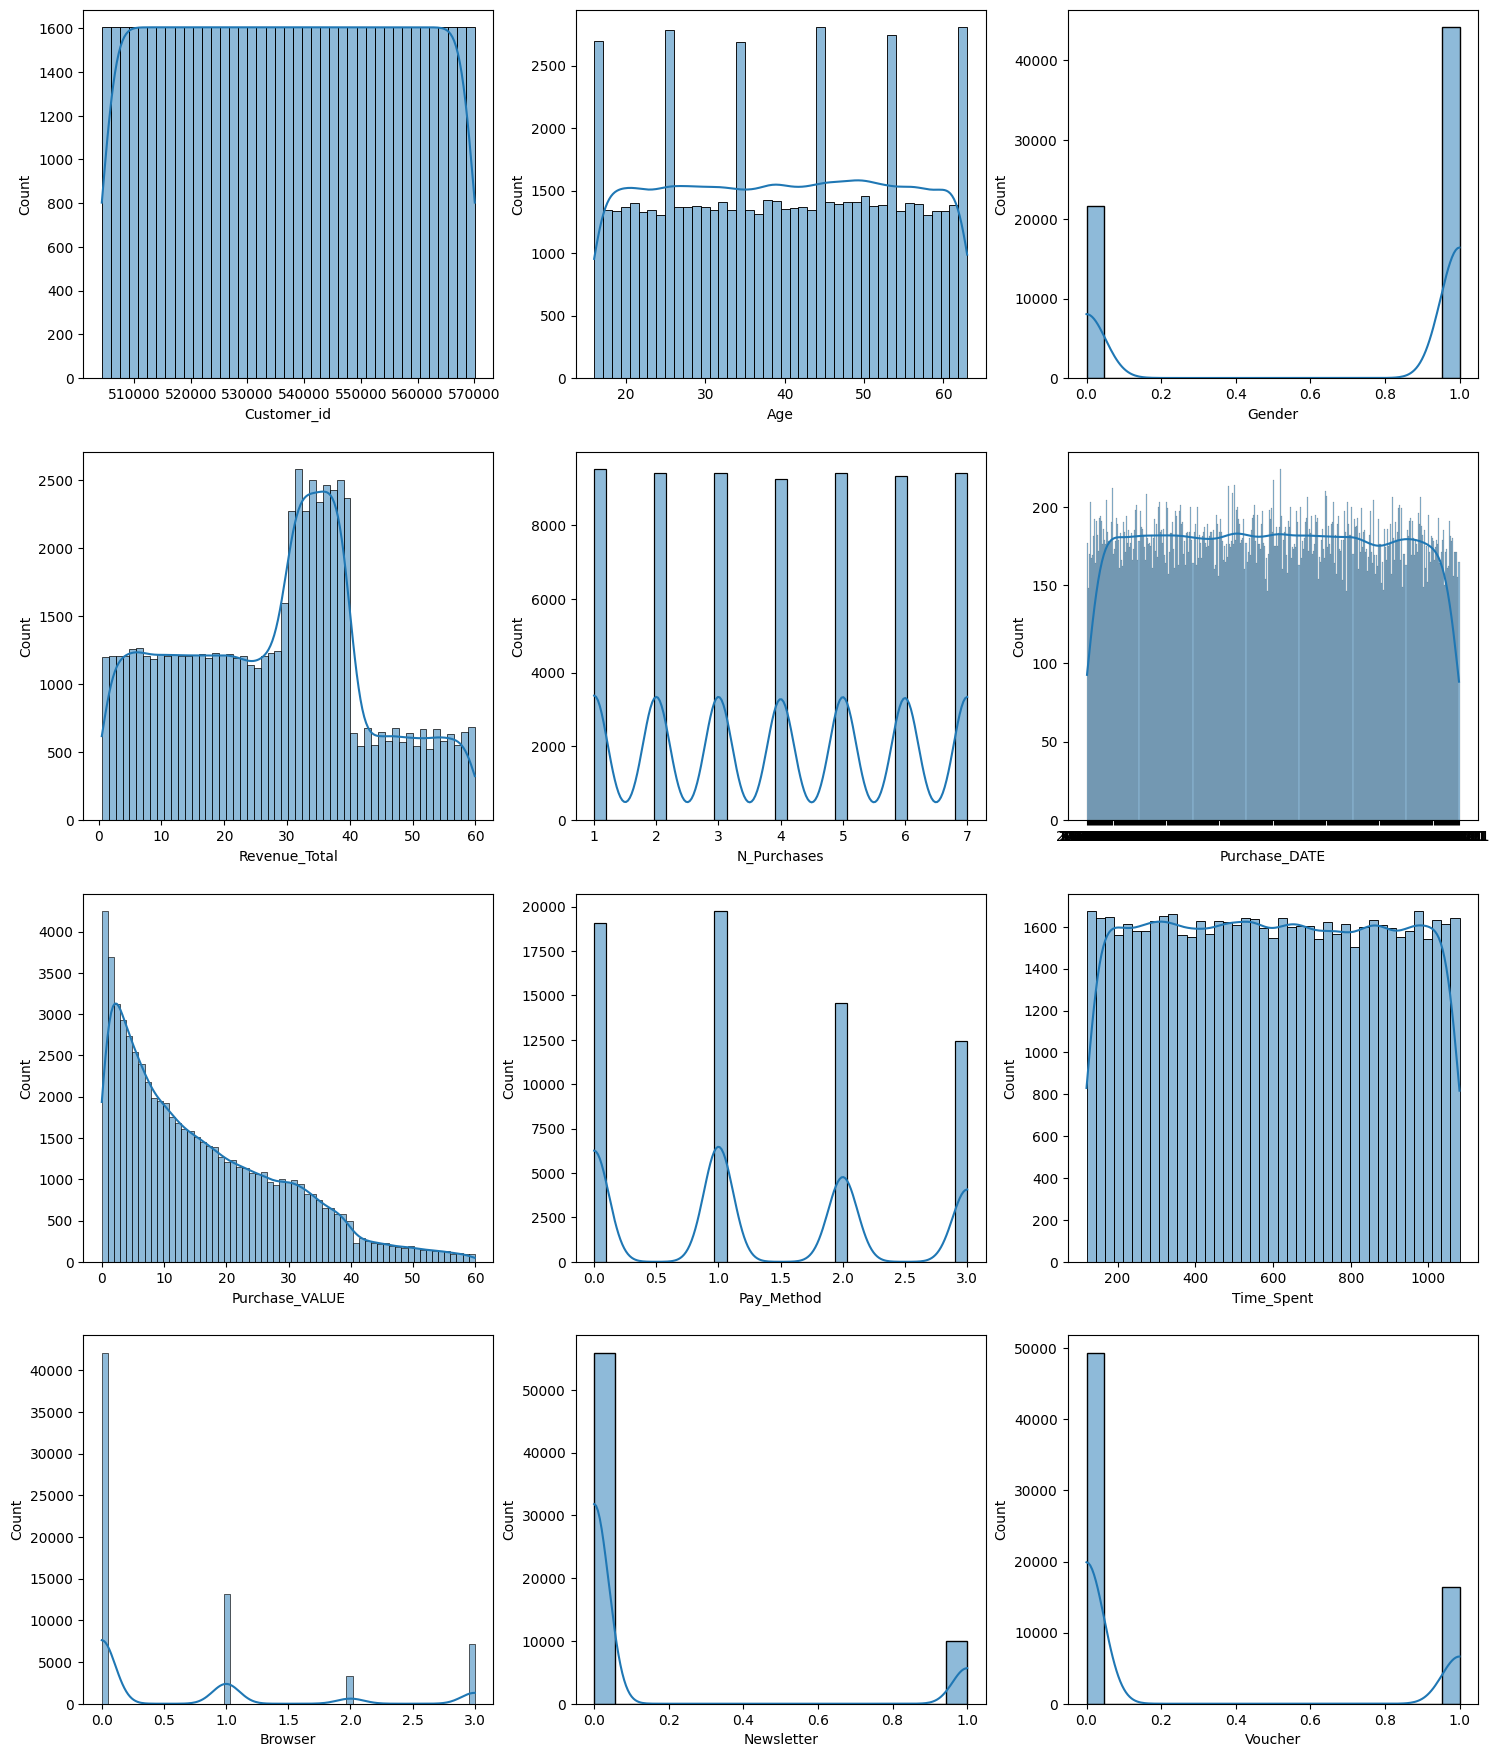

In [9]:
plt.style.use('default')
plt.figure(figsize = (18, 22))

plt.subplots_adjust(hspace = 0.2)

i = 1
for feature in df.columns:
    plt.subplot(4, 3, i)
    sns.histplot(x = feature, data = df, kde = True, palette = 'cool')
    i += 1

plt.show()

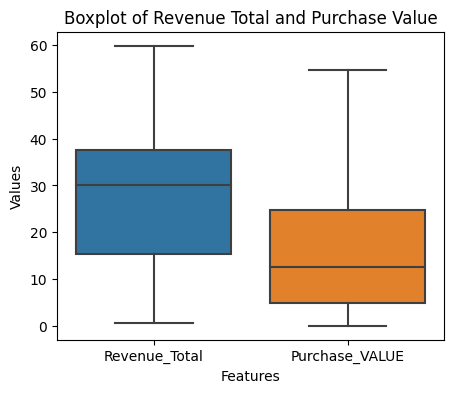

In [10]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.boxplot(data = df[['Revenue_Total', 'Purchase_VALUE']], showfliers = False)

plt.title('Boxplot of Revenue Total and Purchase Value')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

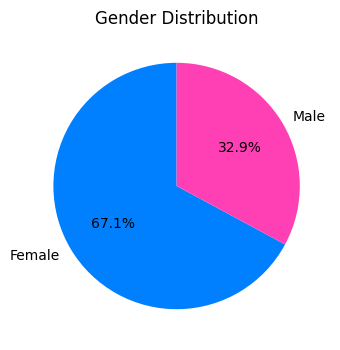

In [12]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

gender_counts = df['Gender'].value_counts()

ax = plt.pie(gender_counts, autopct='%1.1f%%', startangle=90, labels =['Female', 'Male'], colors=['#007fff', '#FF40B4'] )

plt.title('Gender Distribution')
plt.show()


In [209]:
df.nunique()

Customer_id       65796
Age                  48
Gender                2
Revenue_Total       496
N_Purchases           7
Purchase_DATE       366
Purchase_VALUE    16616
Pay_Method            4
Time_Spent          961
Browser               4
Newsletter            2
Voucher               2
month                12
Month                12
dtype: int64

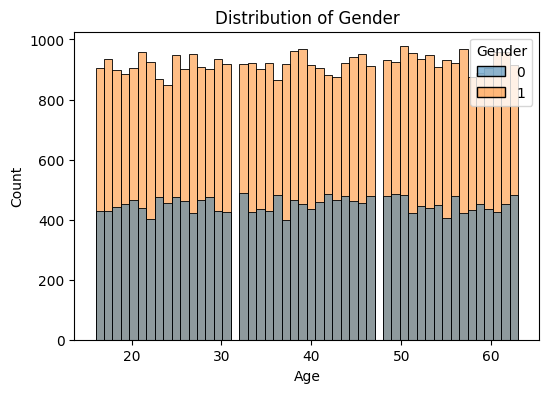

In [160]:
plt.figure(figsize = (6, 4))
plt.style.use('default')

sns.histplot(x = 'Age', hue = 'Gender', data = df, bins = 50)

plt.title('Distribution of Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

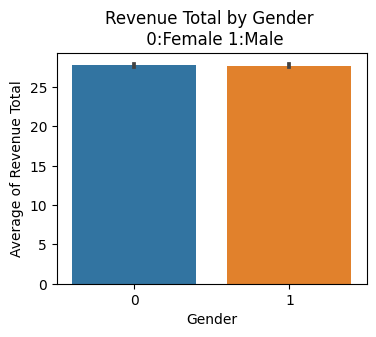

<Figure size 640x480 with 0 Axes>

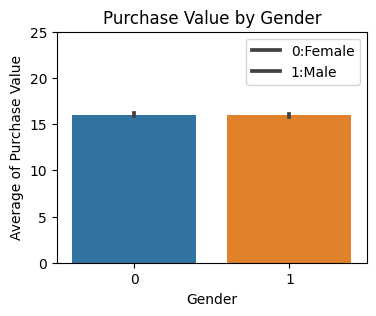

In [30]:
plt.figure(figsize = (4, 3))
plt.style.use('default')

sns.barplot(x = 'Gender', y = 'Revenue_Total', data = df)

plt.xlabel('Gender')
plt.ylabel('Average of Revenue Total')
plt.title('Revenue Total by Gender \n 0:Female 1:Male')
plt.show()

plt.figure(2)
plt.figure(figsize = (4, 3))

sns.barplot(x = 'Gender', y = 'Purchase_VALUE', data = df)

plt.xlabel('Gender')
plt.ylabel('Average of Purchase Value')
plt.title('Purchase Value by Gender')
plt.ylim([0, 25])
plt.legend(['0:Female','1:Male'])
plt.show()

In [225]:
df.nunique()

Customer_id       65796
Age                  48
Gender                2
Revenue_Total       496
N_Purchases           7
Purchase_DATE       366
Purchase_VALUE    16616
Pay_Method            4
Time_Spent          961
Browser               4
Newsletter            2
Voucher               2
month                12
Month                12
dtype: int64

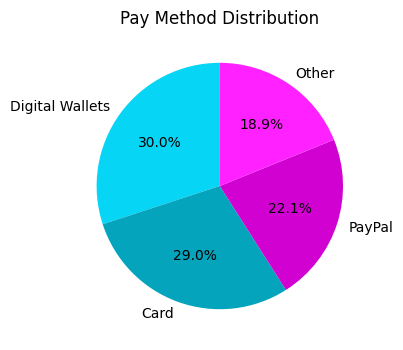

In [167]:
plt.figure(figsize = (6, 4))
plt.style.use('default')

pay_method_counts = df['Pay_Method'].value_counts()

colors = ['#07d5f5','#04a4bd', '#d102d1',  '#ff21ff']
labels = ['Digital Wallets','Card','PayPal','Other']

ax = plt.pie(pay_method_counts, autopct = '%1.1f%%', startangle=90, colors=colors, labels = labels)

plt.title('Pay Method Distribution')
plt.show()


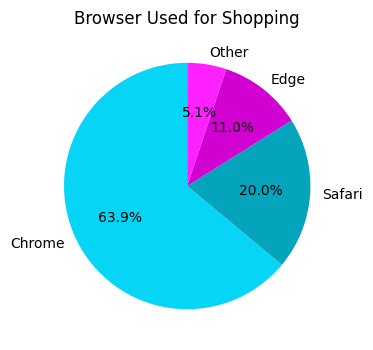

In [169]:
plt.figure(figsize = (6, 4))
plt.style.use('default')

Browser_counts = df['Browser'].value_counts()

colors = ['#07d5f5','#04a4bd', '#d102d1',  '#ff21ff']
labels = ['Chrome','Safari','Edge','Other']

ax = plt.pie(Browser_counts, autopct = '%1.1f%%', startangle=90, colors=colors, labels = labels)

plt.title('Browser Used for Shopping')
plt.show()

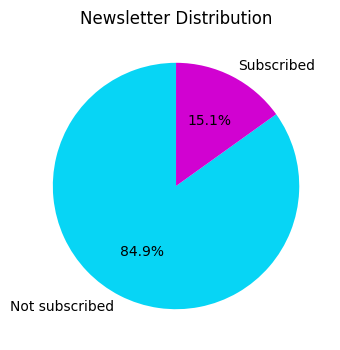

In [170]:
plt.figure(figsize = (6, 4))
plt.style.use('default')

newsletter_count = df['Newsletter'].value_counts()

colors = ['#07d5f5','#d102d1']
labels = ['Not subscribed','Subscribed']
ax = plt.pie(newsletter_count, autopct = '%1.1f%%', startangle = 90, colors = colors, labels = labels)

plt.title('Newsletter Distribution')
plt.show()

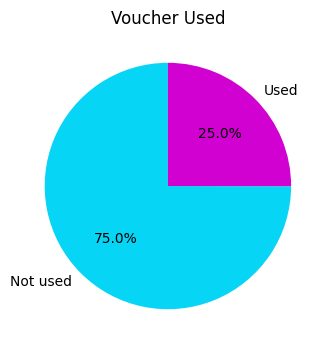

In [181]:
plt.figure(figsize = (6, 4))
plt.style.use('default')
Voucher_count = df['Voucher'].value_counts()

colors = ['#07d5f5','#d102d1']
labels = ['Not used','Used']
ax = plt.pie(Voucher_count, autopct = '%1.1f%%', startangle = 90, colors = colors, labels = labels)

plt.title('Voucher Used')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'title1'

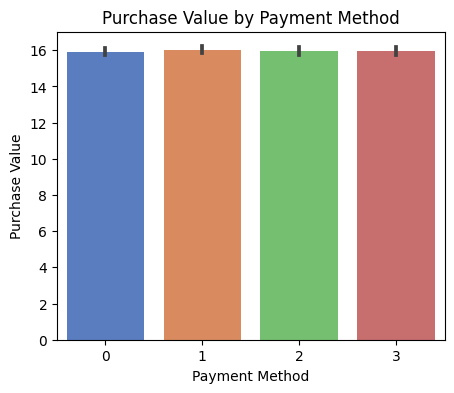

In [44]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Pay_Method', y = 'Purchase_VALUE', data = df, palette = 'muted')

plt.xlabel('Payment Method')
plt.ylabel('Purchase Value')
plt.title('Purchase Value by Payment Method')
plt.title('Sandip')
plt.show()


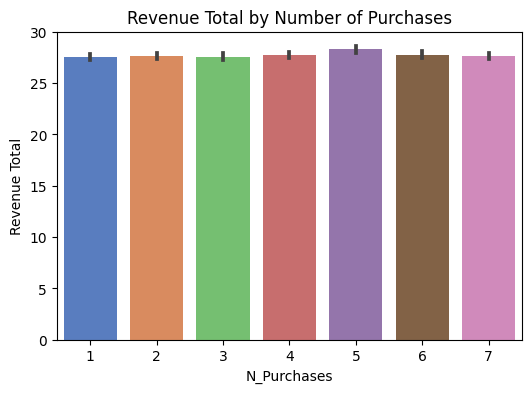

In [174]:
plt.figure(figsize = (6, 4))
plt.style.use('default')

sns.barplot(x = 'N_Purchases', y = 'Revenue_Total', data = df, palette = 'muted')

plt.xlabel('N_Purchases')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Number of Purchases')

plt.show()

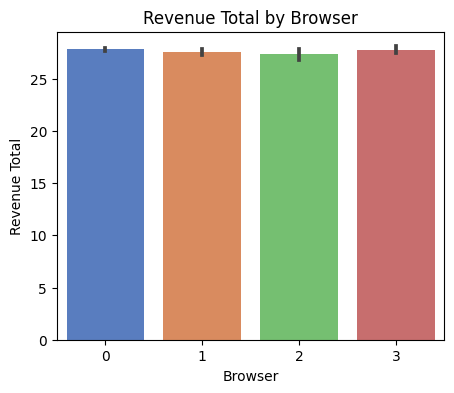

In [175]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Browser', y = 'Revenue_Total', data = df, palette = 'muted')

plt.xlabel('Browser')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Browser')

plt.show()

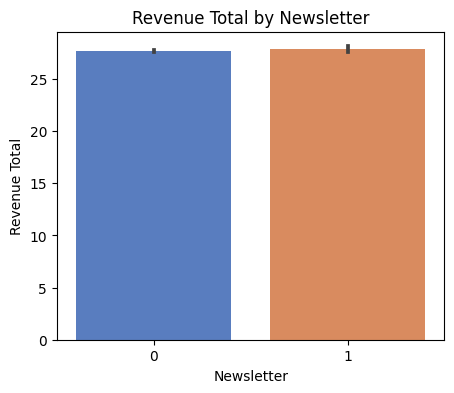

In [176]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Newsletter', y = 'Revenue_Total', data = df, palette = 'muted')

plt.xlabel('Newsletter')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Newsletter')

plt.show()


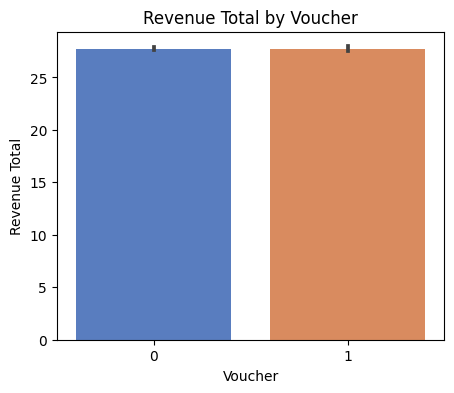

In [177]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Voucher', y = 'Revenue_Total', data = df, palette = 'muted')

plt.xlabel('Voucher')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Voucher')

plt.show()


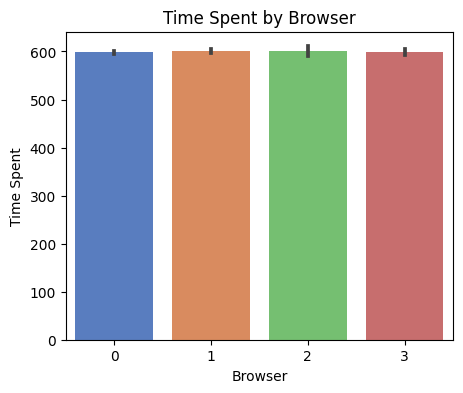

In [179]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Browser', y = 'Time_Spent', data = df, palette = 'muted')

plt.xlabel('Browser')
plt.ylabel('Time Spent')
plt.title('Time Spent by Browser')

plt.show()

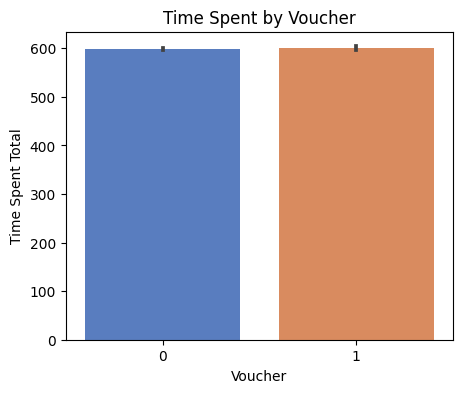

In [183]:
plt.figure(figsize = (5, 4))
plt.style.use('default')

sns.barplot(x = 'Voucher', y = 'Time_Spent', data = df, palette = 'muted')

plt.xlabel('Voucher')
plt.ylabel('Time Spent Total')
plt.title('Time Spent by Voucher')

plt.show()


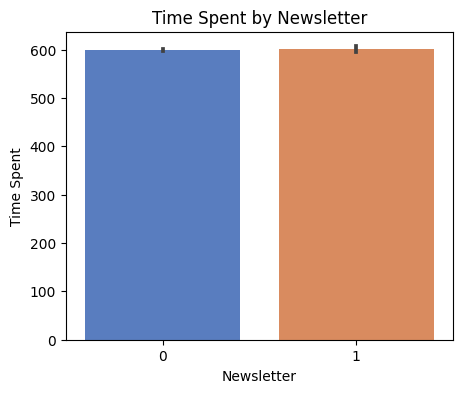

In [184]:
plt.figure(figsize = (5, 4))

sns.barplot(x = 'Newsletter', y = 'Time_Spent', data = df, palette = 'muted')

plt.xlabel('Newsletter')
plt.ylabel('Time Spent')
plt.title('Time Spent by Newsletter')
plt.show()

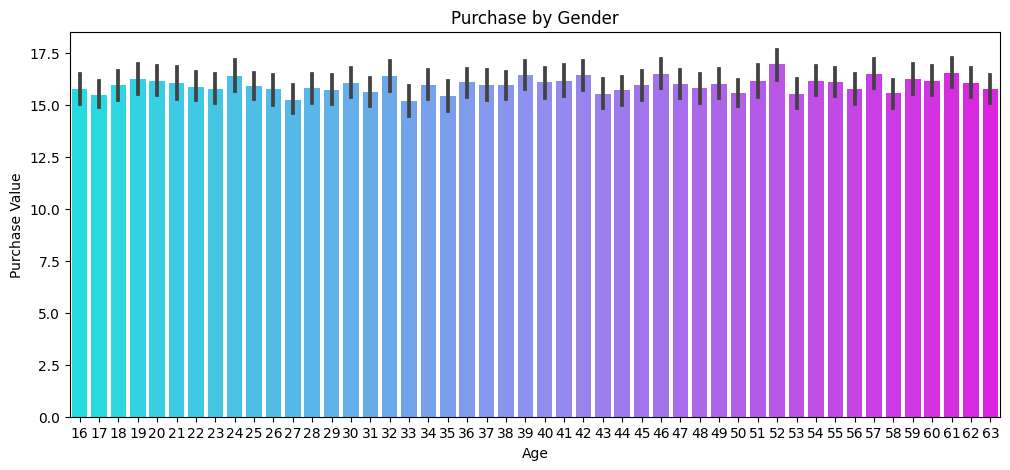

In [187]:
plt.figure(figsize = (12, 5))
plt.style.use('default')

sns.barplot(x = 'Age', y = 'Purchase_VALUE', data = df, palette = 'cool')

plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.title('Purchase by Gender')

plt.show()


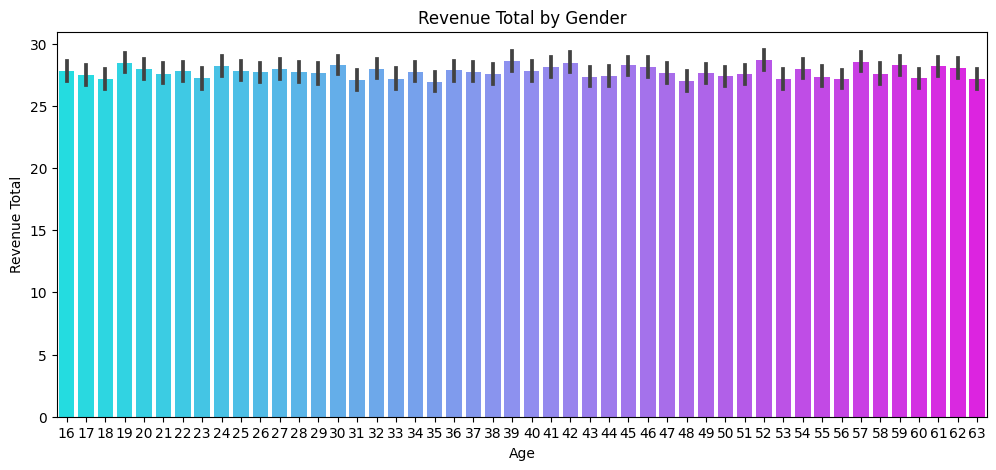

In [188]:
plt.figure(figsize = (12, 5))
plt.style.use('default')

sns.barplot(x = 'Age', y = 'Revenue_Total', data = df, palette = 'cool')

plt.xlabel('Age')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Gender')

plt.show()

In [190]:
df.nunique()

Customer_id       65796
Age                  48
Gender                2
Revenue_Total       496
N_Purchases           7
Purchase_DATE       366
Purchase_VALUE    16616
Pay_Method            4
Time_Spent          961
Browser               4
Newsletter            2
Voucher               2
dtype: int64

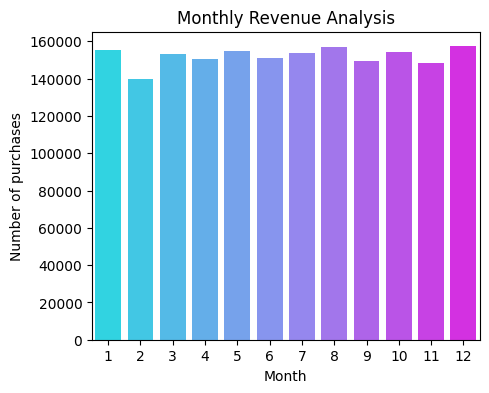

In [239]:
plt.figure(figsize = (5, 4))

df['Month'] = pd.DatetimeIndex(df['Purchase_DATE']).month

grouped_df = df.groupby('Month')[['Revenue_Total']].sum()

sorted_df = grouped_df.sort_values(by = 'Revenue_Total', ascending = False)

sns.barplot(x = sorted_df.index, y = 'Revenue_Total', data = sorted_df, palette = 'cool')

plt.xlabel('Month')
plt.ylabel('Number of purchases')
plt.title('Monthly Revenue Analysis')

plt.show()


In [195]:
print(df['Month'] )

0         6
1        10
2         3
3        10
4         9
         ..
65791     2
65792     5
65793    10
65794     9
65795    10
Name: Month, Length: 65796, dtype: int64


In [193]:
print(df['Purchase_DATE'] )

0        22.06.21
1        10.12.21
2        14.03.21
3        25.10.21
4        14.09.21
           ...   
65791    15.02.21
65792    05.02.21
65793    29.10.21
65794    09.12.21
65795    23.10.21
Name: Purchase_DATE, Length: 65796, dtype: object


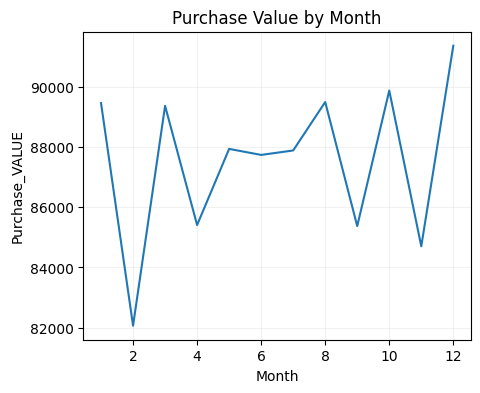

In [204]:
plt.figure(figsize = (5,4))

monthly_purchase_value = df.groupby('Month')['Purchase_VALUE'].sum()

plt.plot(monthly_purchase_value.index, monthly_purchase_value.values)

plt.xlabel('Month')
plt.ylabel('Purchase_VALUE')
plt.title('Purchase Value by Month')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.show()

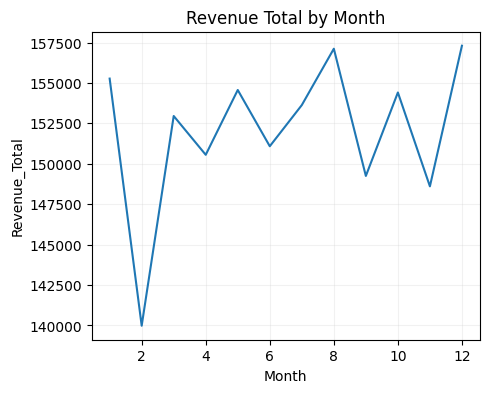

In [203]:
plt.figure(figsize = (5,4))

#line_color = '#FF00B4'

monthly_revenue_total = df.groupby('Month')['Revenue_Total'].sum()

plt.plot(monthly_revenue_total.index, monthly_revenue_total.values)

plt.xlabel('Month')
plt.ylabel('Revenue_Total')
plt.title('Revenue Total by Month')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.show()

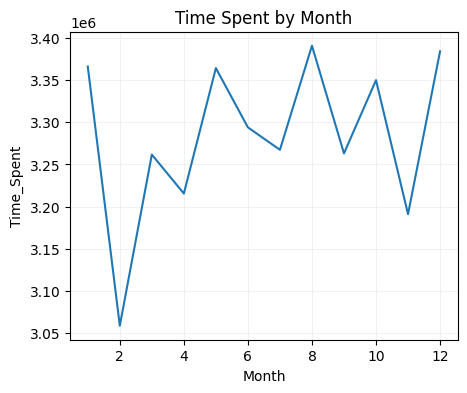

In [206]:
plt.figure(figsize = (5,4))

monthly_purchase_value = df.groupby('Month')['Time_Spent'].sum()

plt.plot(monthly_purchase_value.index, monthly_purchase_value.values)

plt.xlabel('Month')
plt.ylabel('Time_Spent')
plt.title('Time Spent by Month')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.show()